<a href="https://colab.research.google.com/github/db-telkomsby/bigdataanalytic/blob/main/Naive_Bayes_Model_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Hands-on of Big Data Analyst with TuV Certified Qualification*


---



# 2. Data Mining Model - Structured Data (Part 2)

Sub topics covered in this practice:
* Classification
* Clustering
* Association

### **Classification**

Here we model the classification model from telco customer churn data (https://www.kaggle.com/blastchar/telco-customer-churn). This data is consist of customer profile, customer subscription history, and their churn information.

Each row represents a customer, each column contains customer’s attributes described below:
1.   customerID : Customer ID
2.   gender : Whether the customer is a male or a female
3.   SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
4.   Partner : Whether the customer has a partner or not (Yes, No)
5.   Dependents : Whether the customer has dependents or not (Yes, No)
6.   tenure : Number of months the customer has stayed with the company
7.   PhoneService : Whether the customer has a phone service or not (Yes, No)
8.   MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
9.   InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
10.   OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
11.   OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
12.   DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
13.   TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
14.   StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
15.   StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
16.   Contract : The contract term of the customer (Month-to-month, One year, Two year)
17.   PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
18.   PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19.   MonthlyCharges : The amount charged to the customer monthly
20.   TotalCharges : The total amount charged to the customer
21.   Churn Whether: the customer churned or not (Yes or No)

We will predict customer behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Import Libraries

In [1]:
# Import Library
import pandas as pd

Import Raw Dataset

In [2]:
# Import Data to Google Colab
df_churn = pd.read_csv('https://raw.githubusercontent.com/db-telkomsby/bigdataanalytic/main/Data%20Mining%20Model/Classification%20Model/customer_churn.csv', sep = ';')
df_churn

# Show 10 first Row
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,2985,2985.0,0
1,5575-GNVDE,Male,0,0,0,34,1,DSL,1,0,1,0,0,0,One year,0,Mailed check,5695,18895.0,0
2,3668-QPYBK,Male,0,0,0,2,1,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,5385,10815.0,1
3,7795-CFOCW,Male,0,0,0,45,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),423,184075.0,0
4,9237-HQITU,Female,0,0,0,2,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,707,15165.0,1


In [3]:
# Prints the Dataset Information
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [4]:
# Prints Descriptive Statistics
df_churn.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043.0,0.483033,0.499748,0.0,0.0,0.0,1.0,1.0
Dependents,7043.0,0.299588,0.458110,0.0,0.0,0.0,1.0,1.0
tenure,7043.0,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043.0,0.903166,0.295752,0.0,1.0,1.0,1.0,1.0
OnlineSecurity,7043.0,0.286668,0.452237,0.0,0.0,0.0,1.0,1.0
OnlineBackup,7043.0,0.344881,0.475363,0.0,0.0,0.0,1.0,1.0
DeviceProtection,7043.0,0.343888,0.475038,0.0,0.0,0.0,1.0,1.0
TechSupport,7043.0,0.290217,0.453895,0.0,0.0,0.0,1.0,1.0
StreamingTV,7043.0,0.384353,0.486477,0.0,0.0,0.0,1.0,1.0


Data Preprocessing

Handling Missing Values

In [5]:
# Check for Missing Values
df_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
# Search for Median Value
median = df_churn['TotalCharges'].median()

# Use Median to Replace Missing Values
df_churn['TotalCharges'].fillna(median, inplace=True)

# Check for Missing Values
df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Encode Categorical Data

In [7]:
# Import Module
from sklearn.preprocessing import OneHotEncoder

# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_churn[['gender', 'InternetService', 'Contract', 'PaymentMethod']]))
df_encoded.columns = encoder.get_feature_names_out(['gender', 'InternetService', 'Contract', 'PaymentMethod'])

# Replace Categotical Data with Encoded Data
df_churn.drop(['gender', 'InternetService', 'Contract', 'PaymentMethod'] ,axis=1, inplace=True)
df_encoded= pd.concat([df_churn, df_encoded], axis=1)

# Show Encoded Dataframe
df_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,0,1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5575-GNVDE,0,0,0,34,1,1,0,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3668-QPYBK,0,0,0,2,1,1,1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7795-CFOCW,0,0,0,45,0,1,0,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,0,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,2234-XADUH,0,1,1,72,1,0,1,1,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,4801-JZAZL,0,1,1,11,0,1,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,8361-LTMKD,1,1,0,4,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Set Feature and Target

In [8]:
# Select Features
feature = df_encoded.drop(['customerID', 'TotalCharges', 'Churn'], axis=1)
feature

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,1,0,1,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,1,1,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,1,0,1,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,0,1,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0,1,1,72,1,0,1,1,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,0,1,1,11,0,1,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1,1,0,4,1,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
# Select Target
target = df_encoded['Churn']
target

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

Set Training and Testing Data

In [10]:
# Set Training and Testing Data (70:30)
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test  = train_test_split(feature , target, shuffle = True, test_size=0.3, random_state=1)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4930, 25)
(2113, 25)
(4930,)
(2113,)


In [11]:
X_test

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3381,0,0,0,41,1,1,0,1,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6180,1,0,0,66,1,1,0,0,0,1,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4829,0,0,0,12,1,0,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3737,0,0,0,5,1,0,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4249,0,1,1,10,1,0,1,1,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3934,0,0,1,10,0,1,1,0,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1351,0,1,1,11,1,0,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2048,1,0,0,21,1,0,0,1,0,1,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6218,0,1,1,70,0,0,1,1,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


#### ***Decision Tree***

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making.

Modeling Decision Tree

In [12]:
# Import Module
from sklearn import tree

# Modeling Decision Tree
dtc = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtc.fit(X_train, y_train)

# Predict to Test Data
y_pred_dtc = dtc.predict(X_test)

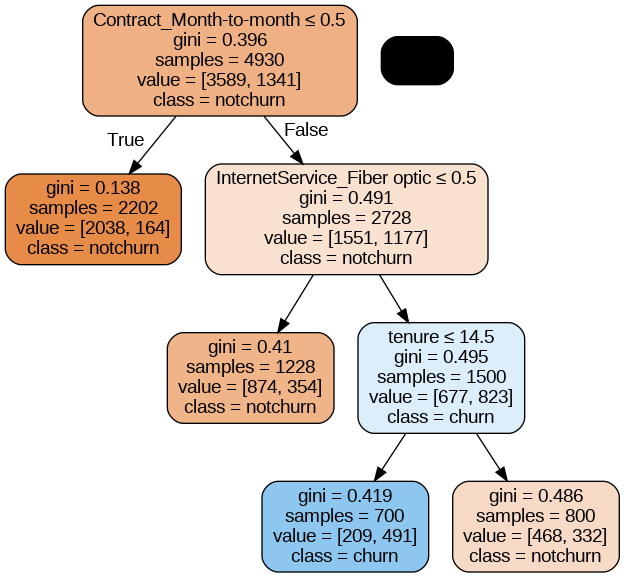

In [18]:
# Visualize Tree
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                class_names=['notchurn', 'churn'],
                feature_names=['SeniorCitizen',	'Partner',	'Dependents', 'tenure',	'PhoneService', 'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',
                               'TechSupport',	'StreamingTV',	'StreamingMovies',	'PaperlessBilling',	'MonthlyCharges', 'gender_Female',
                               'gender_Male',	'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',	'Contract_Month-to-month',
                               'Contract_One year',	'Contract_Two year',	'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
                               'PaymentMethod_Electronic check',	'PaymentMethod_Mailed check'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Model Evaluation

In [19]:
# Import Module
from sklearn import metrics

# Show the Confussion Matrix
cm_dtc = metrics.confusion_matrix(y_test, y_pred_dtc)
cm_dtc

array([[1494,   91],
       [ 327,  201]])

In [20]:
# Show the Accuracy, Precision, Recall
acc_dtc = metrics.accuracy_score(y_test, y_pred_dtc)
prec_dtc = metrics.precision_score(y_test, y_pred_dtc)
rec_dtc = metrics.recall_score(y_test, y_pred_dtc)
f1_dtc = metrics.f1_score(y_test, y_pred_dtc)
kappa_dtc = metrics.cohen_kappa_score(y_test, y_pred_dtc)

print("Accuracy:", acc_dtc)
print("Precision:", prec_dtc)
print("Recall:", rec_dtc)
print("F1 Score:", f1_dtc)
print("Cohens Kappa Score:", kappa_dtc)

Accuracy: 0.8021769995267393
Precision: 0.6883561643835616
Recall: 0.3806818181818182
F1 Score: 0.4902439024390244
Cohens Kappa Score: 0.3798855303768567


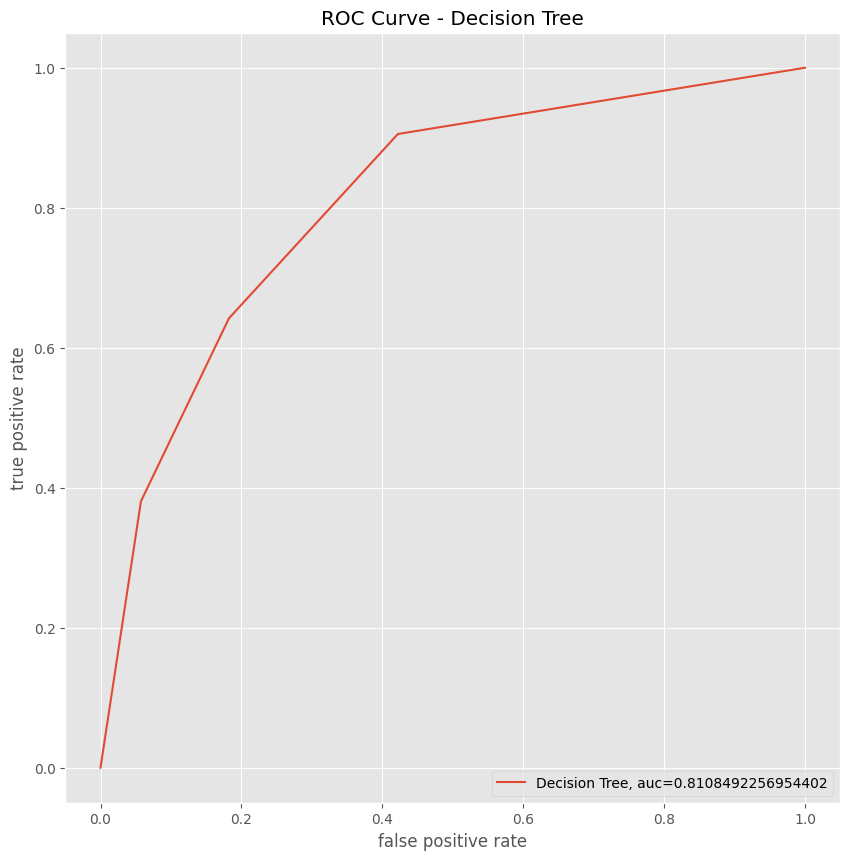

In [21]:
# Import Visualization Package
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_dtc_proba = dtc.predict_proba(X_test)[::,1]
fprdtc, tprdtc, _ = metrics.roc_curve(y_test,  y_pred_dtc_proba)
aucdtc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.title('ROC Curve - Decision Tree')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

#### ***Naive Bayes***

Modeling Naive Bayes

In [22]:
# Import Module
from sklearn.naive_bayes import GaussianNB

# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict to Test Data
y_pred_gnb= gnb.predict(X_test)

Model Evaluation

In [23]:
# Show the Confussion Matrix
from sklearn import metrics

cm_gnb = metrics.confusion_matrix(y_test, y_pred_gnb)
cm_gnb

array([[1163,  422],
       [  97,  431]])

In [24]:
# Show the Accuracy, Precision, Recall
acc_gnb = metrics.accuracy_score(y_test, y_pred_gnb)
prec_gnb = metrics.precision_score(y_test, y_pred_gnb)
rec_gnb = metrics.recall_score(y_test, y_pred_gnb)
f1_gnb = metrics.f1_score(y_test, y_pred_gnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_pred_gnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

Accuracy: 0.7543776620918126
Precision: 0.5052754982415005
Recall: 0.8162878787878788
F1 Score: 0.6241853729181751
Cohens Kappa Score: 0.45637478095559125


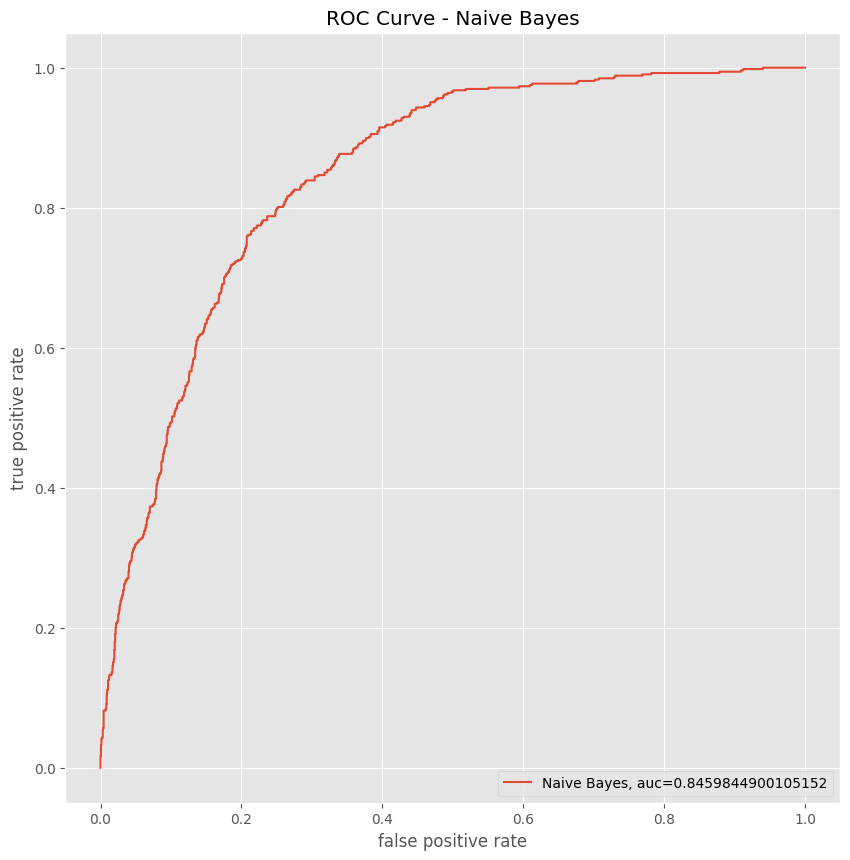

In [25]:
# ROC Curve
# Import Visualization Package
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



y_pred_gnb_proba = gnb.predict_proba(X_test)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(y_test,  y_pred_gnb_proba)
aucgnb = metrics.roc_auc_score(y_test, y_pred_gnb_proba)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

#### ***Model Comparison***

In [26]:
# Comparing Model Performance
print("Decision Tree Accuracy =",acc_dtc)
print("Decision Tree Precision =",prec_dtc)
print("Decision Tree Recall =",rec_dtc)
print("Decision Tree F1-Score =", f1_dtc)
print("_______________________")
print("Naive Bayes Accuracy =", acc_gnb)
print("Naive Bayes Precision =", prec_gnb)
print("Naive Bayes Recall =", rec_gnb)
print("Naive Bayes F1-Score =", f1_gnb)

Decision Tree Accuracy = 0.8021769995267393
Decision Tree Precision = 0.6883561643835616
Decision Tree Recall = 0.3806818181818182
Decision Tree F1-Score = 0.4902439024390244
_______________________
Naive Bayes Accuracy = 0.7543776620918126
Naive Bayes Precision = 0.5052754982415005
Naive Bayes Recall = 0.8162878787878788
Naive Bayes F1-Score = 0.6241853729181751


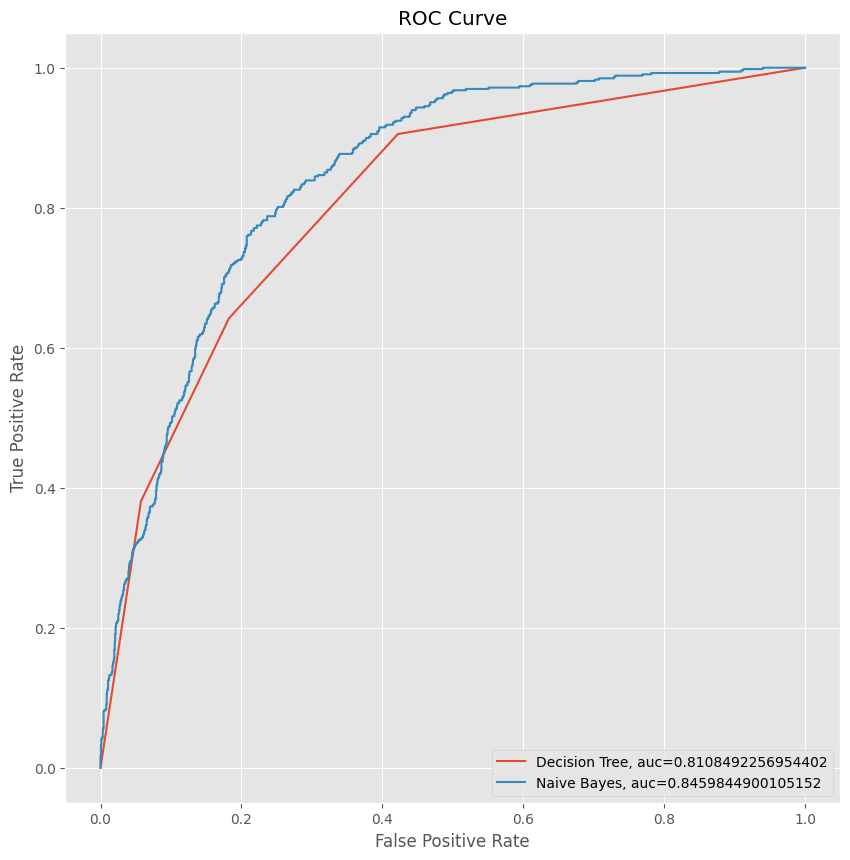

In [27]:
# Comparing ROC Curve
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [28]:
# Create Datafame Contains Fature and Result of prediction
df_compare = X_test.copy()
df_compare['ActualClass'] = y_test
df_compare['DecisonTree'] = y_pred_dtc
df_compare['NaiveBayes'] = y_pred_gnb

In [29]:
df_compare.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ActualClass,DecisonTree,NaiveBayes
3381,0,0,0,41,1,1,0,1,1,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0
6180,1,0,0,66,1,1,0,0,0,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0
4829,0,0,0,12,1,0,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1
3737,0,0,0,5,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1
4249,0,1,1,10,1,0,1,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0


#### **Predict New Data**

Import New Data

In [30]:
# Import New Dataset
df_new_churn = pd.read_csv('https://raw.githubusercontent.com/db-telkomsby/bigdataanalytic/main/Data%20Mining%20Model/Classification%20Model/churn_new.csv', sep =';')
df_new_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,NEW001,Female,1,1,0,69,1,Fiber optic,1,1,0,0,1,1,Month-to-month,1,Electronic check,1003,448395
1,NEW002,Male,0,0,0,47,0,No,0,0,0,0,0,0,Month-to-month,0,Electronic check,2025,1785
2,NEW003,Male,0,0,0,55,1,Fiber optic,0,0,0,0,1,1,Month-to-month,1,Credit card (automatic),947,168795
3,NEW004,Male,0,0,0,12,1,No,0,0,0,0,0,0,One year,1,Credit card (automatic),2005,7545
4,NEW005,Male,0,1,0,65,1,Fiber optic,0,0,0,1,1,1,Month-to-month,1,Electronic check,1006,506965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NEW396,Female,0,0,0,50,1,DSL,0,0,0,0,0,0,Month-to-month,1,Credit card (automatic),453,453
396,NEW397,Male,0,1,1,2,1,Fiber optic,0,0,0,1,1,0,Two year,1,Bank transfer (automatic),915,323635
397,NEW398,Male,0,0,0,67,1,DSL,0,0,0,1,1,1,Month-to-month,1,Electronic check,7345,26611
398,NEW399,Male,0,1,1,71,1,DSL,0,1,0,0,0,1,Two year,0,Mailed check,6405,39026


Preprocess the New Data

In [31]:
# Import Module
from sklearn.preprocessing import OneHotEncoder

# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_new_churn2 = pd.DataFrame(encoder.fit_transform(df_new_churn[['gender', 'InternetService', 'Contract', 'PaymentMethod']]))
df_new_churn2.columns = encoder.get_feature_names_out(['gender', 'InternetService', 'Contract', 'PaymentMethod'])

# Concat the Encoded Data
df_new_churn_encoded = df_new_churn.drop(['gender', 'InternetService', 'Contract', 'PaymentMethod'] ,axis=1, inplace=True)
df_new_churn_encoded = pd.concat([df_new_churn, df_new_churn2], axis=1)

# Show Encoded Dataframe
df_new_churn_encoded

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,NEW001,1,1,0,69,1,1,1,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,NEW002,0,0,0,47,0,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,NEW003,0,0,0,55,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,NEW004,0,0,0,12,1,0,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,NEW005,0,1,0,65,1,0,0,0,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NEW396,0,0,0,50,1,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
396,NEW397,0,1,1,2,1,0,0,0,1,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
397,NEW398,0,0,0,67,1,0,0,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
398,NEW399,0,1,1,71,1,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [32]:

# Select Features
new_feature = df_new_churn_encoded.drop(['customerID', 'TotalCharges'], axis=1)
new_feature

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,1,0,69,1,1,1,0,0,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,47,0,0,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,55,1,0,0,0,0,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,12,1,0,0,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,1,0,65,1,0,0,0,1,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,50,1,0,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
396,0,1,1,2,1,0,0,0,1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
397,0,0,0,67,1,0,0,0,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
398,0,1,1,71,1,0,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Predict New Customer Data

In [36]:
# Predict using Decision Tree Classifier
new_predicted_dtree = pd.DataFrame(dtc.predict(new_feature), columns = ['churn_decision_tree'])
new_predicted_dtree.reset_index()
new_predicted_dtree

,churn_decision_tree
0,0
1,0
2,0
3,0
4,0
...,...
395,0
396,0
397,0
398,0


In [37]:
# Predict using Naive Bayes Classifier
new_predicted_nb = pd.DataFrame(gnb.predict(new_feature), columns = ['churn_naive_bayes'])
new_predicted_nb.reset_index()
new_predicted_nb

,churn_naive_bayes
0,1
1,0
2,1
3,0
4,1
...,...
395,0
396,0
397,1
398,0


Show Prediction Comparation

In [38]:
# Show Prediction Result
pred_new_churn = pd.concat([df_new_churn, new_predicted_dtree, new_predicted_nb], axis=1)
pred_new_churn

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,churn_decision_tree,churn_naive_bayes
0,NEW001,1,1,0,69,1,1,1,0,0,1,1,1,1003,448395,0,1
1,NEW002,0,0,0,47,0,0,0,0,0,0,0,0,2025,1785,0,0
2,NEW003,0,0,0,55,1,0,0,0,0,1,1,1,947,168795,0,1
3,NEW004,0,0,0,12,1,0,0,0,0,0,0,1,2005,7545,0,0
4,NEW005,0,1,0,65,1,0,0,0,1,1,1,1,1006,506965,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NEW396,0,0,0,50,1,0,0,0,0,0,0,1,453,453,0,0
396,NEW397,0,1,1,2,1,0,0,0,1,1,0,1,915,323635,0,0
397,NEW398,0,0,0,67,1,0,0,0,1,1,1,1,7345,26611,0,1
398,NEW399,0,1,1,71,1,0,1,0,0,0,1,0,6405,39026,0,0


Save Prediction Result

In [39]:
# Save Prediction Result
pred_new_churn.to_csv('new_churn_prediction.csv', index=False)